In [18]:
import os
import datetime
from datetime import datetime, timedelta

import numpy as np
import pandas as pd

import _pickle as cPickle
import gzip
import dask
from dask import compute, delayed
import functools
import warnings
warnings.filterwarnings('ignore')

In [19]:
# 根目录HEAD_PATH
HEAD_PATH = "order book data"
# 数据保存根目录
SAVE_PATH = "order book data"
# 样本的目录
DATA_PATH_1 = HEAD_PATH + "/order book tick/"
DATA_PATH_2 = HEAD_PATH + "/order flow tick/"
TMP_DATA_PATH = HEAD_PATH + "/tmp pkl/"

In [20]:
def load(path):
    with gzip.open(path, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    return cPickle.loads(raw_data)

def save(data, path):
    serialized = cPickle.dumps(data)
    with gzip.open(path, 'wb', compresslevel=1) as file_object:
        file_object.write(serialized)

def parLapply(CORE_NUM, iterable, func, *args, **kwargs):
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(func, *args, **kwargs)
        result = compute([delayed(f_par)(item) for item in iterable])[0]
        return result

In [21]:
data = load(DATA_PATH_1+"cu/20220104.pkl")
data
# 21:00 - 00:59
# 09:00 - 11:30 -- 13:30 - 15:00
# 09:00 - 11:30 -- 13:30 - 15:00 -- 21:00 - 00:59
# 09:00 - 11:30 -- 13:30 - 15:00

,LastPrice,Volume,Turnover,UpdateTime,UpdateMillisec,BidPrice1,BidVolume1,AskPrice1,AskVolume1,BidPrice2,...,AskVolume3,BidPrice4,BidVolume4,AskPrice4,AskVolume4,BidPrice5,BidVolume5,AskPrice5,AskVolume5,good
0,70010.0,0.0,0.0,18:39:05,700,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,False
1,70200.0,84.0,29484000.0,20:59:00,500,70190.0,4,70200.0,98.0,70180.0,...,2.0,70160.0,4,70240.0,2.0,70150.0,31,70260.0,3.0,False
2,70190.0,25.0,8773650.0,21:00:00,500,70170.0,5,70190.0,17.0,70160.0,...,5.0,70140.0,2,70220.0,16.0,70120.0,12,70230.0,2.0,False
3,70170.0,77.0,27016350.0,21:00:01,0,70150.0,30,70170.0,7.0,70140.0,...,108.0,70120.0,14,70210.0,6.0,70110.0,31,70220.0,18.0,False
4,70190.0,31.0,10876500.0,21:00:01,500,70170.0,4,70190.0,14.0,70160.0,...,8.0,70140.0,4,70220.0,23.0,70130.0,2,70230.0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85813,70130.0,0.0,0.0,14:59:58,500,70110.0,5,70130.0,24.0,70100.0,...,6.0,70080.0,4,70160.0,5.0,70070.0,1,70170.0,5.0,False
85814,70130.0,0.0,0.0,14:59:59,0,70110.0,5,70120.0,1.0,70100.0,...,19.0,70080.0,4,70150.0,6.0,70070.0,1,70160.0,5.0,False
85815,70130.0,0.0,0.0,14:59:59,500,70110.0,5,70120.0,8.0,70100.0,...,19.0,70080.0,4,70150.0,6.0,70070.0,1,70160.0,5.0,False
85816,70110.0,1.0,350550.0,15:00:00,0,70110.0,5,70120.0,8.0,70100.0,...,19.0,70080.0,4,70150.0,6.0,70070.0,1,70160.0,5.0,False


In [22]:
data.loc[data["good"]==True]

,LastPrice,Volume,Turnover,UpdateTime,UpdateMillisec,BidPrice1,BidVolume1,AskPrice1,AskVolume1,BidPrice2,...,AskVolume3,BidPrice4,BidVolume4,AskPrice4,AskVolume4,BidPrice5,BidVolume5,AskPrice5,AskVolume5,good
32086,70510.0,117.0,41248350.0,08:59:00,500,70500.0,15,70550.0,46.0,70490.0,...,4.0,70450.0,17,70600.0,51.0,70440.0,5,70630.0,10.0,True
32087,70490.0,35.0,12337850.0,09:00:00,500,70460.0,17,70490.0,9.0,70450.0,...,7.0,70430.0,1,70530.0,2.0,70420.0,10,70540.0,18.0,True
32088,70460.0,79.0,27835700.0,09:00:01,0,70450.0,2,70460.0,17.0,70440.0,...,32.0,70420.0,9,70500.0,55.0,70410.0,25,70510.0,8.0,True
32089,70450.0,65.0,22897800.0,09:00:01,500,70430.0,1,70440.0,1.0,70420.0,...,4.0,70400.0,6,70480.0,4.0,70370.0,2,70490.0,34.0,True
32090,70440.0,35.0,12325350.0,09:00:02,0,70400.0,7,70430.0,5.0,70390.0,...,14.0,70360.0,2,70460.0,10.0,70330.0,2,70480.0,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68929,70720.0,1.0,353600.0,00:59:57,500,70710.0,5,70720.0,4.0,70650.0,...,21.0,70610.0,1,70750.0,81.0,70600.0,1,70760.0,4.0,True
68930,70720.0,2.0,707150.0,00:59:58,500,70710.0,4,70720.0,3.0,70650.0,...,21.0,70630.0,1,70750.0,81.0,70610.0,1,70760.0,4.0,True
68931,70710.0,2.0,707100.0,00:59:59,0,70710.0,2,70720.0,4.0,70650.0,...,21.0,70630.0,1,70750.0,81.0,70610.0,1,70760.0,4.0,True
68932,70710.0,0.0,0.0,00:59:59,500,70710.0,3,70720.0,4.0,70650.0,...,21.0,70610.0,1,70750.0,81.0,70600.0,1,70760.0,3.0,True


In [23]:
feature_list = ['BidPrice1', 'BidVolume1', 'AskPrice1', 'AskVolume1',
                'BidPrice2', 'BidVolume2', 'AskPrice2', 'AskVolume2',
                'BidPrice3', 'BidVolume3', 'AskPrice3', 'AskVolume3',
                'BidPrice4', 'BidVolume4', 'AskPrice4', 'AskVolume4',
                'BidPrice5', 'BidVolume5', 'AskPrice5', 'AskVolume5',]

In [24]:
def weight_price(data, tao=None, delta=None):
    return (data["BidPrice1"]*data["AskVolume1"]+data["AskPrice1"]*data["BidVolume1"])/(data["BidVolume1"]+data["AskVolume1"])

def difference_of_price(data, tao, delta=None):
    return data["weight_price"].rolling(window=tao, min_periods=1).apply(lambda x: x.iloc[-1] - x.iloc[0])

def m_neg(data, tao, delta=None):
    return data['weight_price'].rolling(window=tao, min_periods=1).mean()

def m_pos(data, tao, delta=None):
    return data['weight_price'].iloc[::-1].rolling(window=tao, min_periods=1).mean().iloc[::-1]

def ret(data, tao, delta=None):
    return (m_pos(data, tao)-m_neg(data, tao))/m_neg(data,tao)

def classify(data, tao, delta):
    return ret(data, tao).apply(lambda x: 1 if x>delta else (-1 if x<-delta else 0))


In [25]:
label_func_list = [weight_price, difference_of_price, m_neg, m_pos, ret, classify]

In [26]:
def get_near_day(date_str, days):
    # 将字符串转换为日期对象
    date_obj = datetime.strptime(date_str, '%Y%m%d')
    # 计算下一天
    if days > 0:
        near_day = date_obj + timedelta(days=days)
    else:
        near_day = date_obj - timedelta(days=-days)
    # 将日期对象转换为字符串
    near_day_str = near_day.strftime('%Y%m%d')
    return near_day_str

In [27]:
def preprocessed_daily_data(file_name, product, feature_list, label_func_list, tao=60, delta=0.0001):
    print(file_name)
    data = load(DATA_PATH_1+product+"/"+file_name)
    data = data[data["good"]==True]

    today = file_name[-12:-4]
    next_day = get_near_day(today, 1)
    data["IsNextDay"] = data["UpdateTime"].str.startswith("00","01")

    data["TimeStamp"] = data.apply(lambda row: next_day[0:4]+"-"+next_day[4:6]+"-"+next_day[6:8]+" "+row["UpdateTime"]+"."+str(row["UpdateMillisec"]) if row["IsNextDay"] else today[0:4]+"-"+today[4:6]+"-"+today[6:8]+" "+row["UpdateTime"]+"."+str(row["UpdateMillisec"]), axis=1)

    data["TimeStamp"] = pd.to_datetime(data["TimeStamp"])

    df_data = data[["TimeStamp"]+feature_list]
    df_data.index = data["TimeStamp"]

    for label_func in label_func_list:
        df_data[label_func.__name__] = label_func(df_data, tao, delta)

    save(df_data, SAVE_PATH+"/tmp pkl/"+product+"/"+today+".pkl")

    return df_data

In [28]:
tao = 60
delta = 0.0001
# file_name = DATA_PATH+product+"/"+"20220104"+".pkl"
file_name = "20220104"+".pkl"
df = preprocessed_daily_data(file_name, "cu", feature_list, label_func_list, tao, delta)
df

20220104.pkl


,TimeStamp,BidPrice1,BidVolume1,AskPrice1,AskVolume1,BidPrice2,BidVolume2,AskPrice2,AskVolume2,BidPrice3,...,BidPrice5,BidVolume5,AskPrice5,AskVolume5,weight_price,difference_of_price,m_neg,m_pos,ret,classify
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2022-01-04 08:59:00.500,2022-01-04 08:59:00.500,70500.0,15,70550.0,46.0,70490.0,3,70570.0,104.0,70460.0,...,70440.0,5,70630.0,10.0,70512.295082,0.000000,70512.295082,70318.508702,-0.002748,-1
2022-01-04 09:00:00.500,2022-01-04 09:00:00.500,70460.0,17,70490.0,9.0,70450.0,12,70500.0,51.0,70440.0,...,70420.0,10,70540.0,18.0,70479.615385,-32.679697,70495.955233,70313.720451,-0.002585,-1
2022-01-04 09:00:01.000,2022-01-04 09:00:01.000,70450.0,2,70460.0,17.0,70440.0,7,70480.0,3.0,70430.0,...,70410.0,25,70510.0,8.0,70451.052632,-61.242450,70480.987699,70309.481247,-0.002433,-1
2022-01-04 09:00:01.500,2022-01-04 09:00:01.500,70430.0,1,70440.0,1.0,70420.0,10,70450.0,20.0,70410.0,...,70370.0,2,70490.0,34.0,70435.000000,-77.295082,70469.490775,70305.416828,-0.002328,-1
2022-01-04 09:00:02.000,2022-01-04 09:00:02.000,70400.0,7,70430.0,5.0,70390.0,1,70440.0,5.0,70370.0,...,70330.0,2,70480.0,3.0,70417.500000,-94.795082,70459.092620,70301.654008,-0.002234,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-05 00:59:57.500,2022-01-05 00:59:57.500,70710.0,5,70720.0,4.0,70650.0,2,70730.0,36.0,70630.0,...,70600.0,1,70760.0,4.0,70715.555556,32.222222,70690.922861,70714.634921,0.000335,1
2022-01-05 00:59:58.500,2022-01-05 00:59:58.500,70710.0,4,70720.0,3.0,70650.0,1,70730.0,36.0,70640.0,...,70610.0,1,70760.0,4.0,70715.714286,32.857143,70691.462544,70714.404762,0.000325,1
2022-01-05 00:59:59.000,2022-01-05 00:59:59.000,70710.0,2,70720.0,4.0,70650.0,1,70730.0,36.0,70640.0,...,70610.0,1,70760.0,4.0,70713.333333,31.666667,70691.970480,70713.968254,0.000311,1


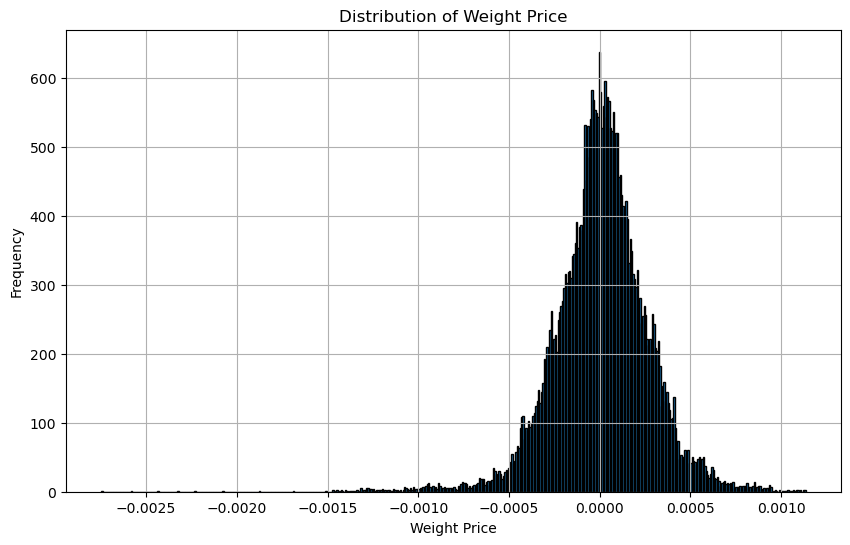

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['ret'], bins=500, edgecolor='black')
plt.title('Distribution of Weight Price')
plt.xlabel('Weight Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [30]:
def data_preprocession(product_list, CORE_NUM, feature_list, label_func_list, tao, delta):
    for product in product_list:
        os.makedirs(SAVE_PATH + "/tmp pkl/" + product, exist_ok=True)
    for product in product_list:
        print(product)
        all_dates = np.array(os.listdir(DATA_PATH_1 + product))
        parLapply(CORE_NUM, all_dates, preprocessed_daily_data,
                  product=product, feature_list=feature_list, label_func_list=label_func_list, tao=tao, delta=delta)

In [31]:
product_list = ["cu", "zn", "ni", "au", "ag"]
CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
feature_list = ['BidPrice1', 'BidVolume1', 'AskPrice1', 'AskVolume1',
                'BidPrice2', 'BidVolume2', 'AskPrice2', 'AskVolume2',
                'BidPrice3', 'BidVolume3', 'AskPrice3', 'AskVolume3',
                'BidPrice4', 'BidVolume4', 'AskPrice4', 'AskVolume4',
                'BidPrice5', 'BidVolume5', 'AskPrice5', 'AskVolume5',]
label_func_list = [weight_price, difference_of_price, m_neg, m_pos, ret, classify]
tao = 60
delta = 0.0001
data_preprocession(product_list, CORE_NUM, feature_list, label_func_list, tao, delta)

cu
zn
ni
au
ag


In [32]:
load(TMP_DATA_PATH+"cu/20220104.pkl")

,TimeStamp,BidPrice1,BidVolume1,AskPrice1,AskVolume1,BidPrice2,BidVolume2,AskPrice2,AskVolume2,BidPrice3,...,BidPrice5,BidVolume5,AskPrice5,AskVolume5,weight_price,difference_of_price,m_neg,m_pos,ret,classify
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2022-01-04 08:59:00.500,2022-01-04 08:59:00.500,70500.0,15,70550.0,46.0,70490.0,3,70570.0,104.0,70460.0,...,70440.0,5,70630.0,10.0,70512.295082,0.000000,70512.295082,70318.508702,-0.002748,-1
2022-01-04 09:00:00.500,2022-01-04 09:00:00.500,70460.0,17,70490.0,9.0,70450.0,12,70500.0,51.0,70440.0,...,70420.0,10,70540.0,18.0,70479.615385,-32.679697,70495.955233,70313.720451,-0.002585,-1
2022-01-04 09:00:01.000,2022-01-04 09:00:01.000,70450.0,2,70460.0,17.0,70440.0,7,70480.0,3.0,70430.0,...,70410.0,25,70510.0,8.0,70451.052632,-61.242450,70480.987699,70309.481247,-0.002433,-1
2022-01-04 09:00:01.500,2022-01-04 09:00:01.500,70430.0,1,70440.0,1.0,70420.0,10,70450.0,20.0,70410.0,...,70370.0,2,70490.0,34.0,70435.000000,-77.295082,70469.490775,70305.416828,-0.002328,-1
2022-01-04 09:00:02.000,2022-01-04 09:00:02.000,70400.0,7,70430.0,5.0,70390.0,1,70440.0,5.0,70370.0,...,70330.0,2,70480.0,3.0,70417.500000,-94.795082,70459.092620,70301.654008,-0.002234,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-05 00:59:57.500,2022-01-05 00:59:57.500,70710.0,5,70720.0,4.0,70650.0,2,70730.0,36.0,70630.0,...,70600.0,1,70760.0,4.0,70715.555556,32.222222,70690.922861,70714.634921,0.000335,1
2022-01-05 00:59:58.500,2022-01-05 00:59:58.500,70710.0,4,70720.0,3.0,70650.0,1,70730.0,36.0,70640.0,...,70610.0,1,70760.0,4.0,70715.714286,32.857143,70691.462544,70714.404762,0.000325,1
2022-01-05 00:59:59.000,2022-01-05 00:59:59.000,70710.0,2,70720.0,4.0,70650.0,1,70730.0,36.0,70640.0,...,70610.0,1,70760.0,4.0,70713.333333,31.666667,70691.970480,70713.968254,0.000311,1


In [33]:
# 订单流数据 DATA_PATH_2 = HEAD_PATH + "/order flow tick/"

## contract: 合约的名字，如 rb1605，表示螺纹钢合约，2016 年 5 月到期；
## date.time: 日期和时间合在一起，方便作图用；
## price: 最新的成交价；
## cum.open.int: 总的持仓量；
## open.int: 最新的持仓量改变量
## turnover: 最新的成交额；
## qty: 最新的成交量；
## bid: 买一价；
## ask: 卖一价；
## bid.qty: 买一量；
## ask.qty: 卖一量；
## date: 实际日期；
## time: 实际时间；
## milli: 毫秒数（上期所与中金所是 0、500，大商所随机，郑商所是 0）；
## mid.price: 买一和卖一的中间价；
## buy.trade: 一档主动买量（估算，非交易所提供）；
## buy2.trade: 其他价位主动买量（估算，非交易所提供）；
## sell.trade: 一档主动卖量（估算，非交易所提供）；
## sell2.trade: 其他价位主动买量（估算，非交易所提供）；
## log.price: wpr 的对数（wpr 下面定义）；
## ret: 最新一笔行情的对数收益率；
## wpr: 挂单量加权平均价；
## wpr.ret: wpr 的价格变化；
## min.1024: 过去 1024 笔行情的 wpr 最小值
## max.1024: 过去 1024 笔行情的 wpr 最大值；
## high: 当前 ask、前一个 ask、最新价的最高价（构造最小级别 K 线用）；
## low: 当前 bid、前一个 bid、最新价的最低价（狗仔最小级别 K 线用）；
## next.bid: 主动卖单的成交价（估算，非交易所提供），用于回测；
## next.ask: 主动买单的成交价（估算，非交易所提供），用于回测；
## min.1024: 1024跳滚动最低价
## max.1024: 1024跳滚动最高价
## min.2048: 2048跳滚动最低价
## max.2048: 2048跳滚动最高价
## min.4096: 4096滚动最低价
## max.4096: 4096滚动最高价